In [1]:
pip install numpy pandas matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('./data/train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [6]:
def ReLU(Z):
    # ReLU function
    # Return the maximum of 0 and Z
    # In other words:
    # If Z is positive, return Z
    # If Z is negative, return 0
    return np.maximum(0, Z)

def ReLU_deriv(Z):
    # Derivative of ReLU function
    # Return 1 if Z is positive, 0 otherwise
    return Z > 0

def softmax(Z):
    # Softmax function
    # Return the exponential of Z, divided by the sum of the exponential of Z
    return np.exp(Z) / sum(np.exp(Z))

def one_hot(Y):
    # One-hot encoding function
    # Return a matrix of 0s with the same shape of Y
    # Set the value of the index of Y to 1
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    # Return the transposed matrix to match the shape of the input
    return one_hot_Y.T


    

In [7]:
def init_params():
    # Initialize the parameters
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2
    
def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    return W1, b1, W2, b2

In [10]:
def get_predictions(A2):
    # Get the index of the maximum value in A2
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    # Calculate the accuracy of the predictions
    print(predictions, Y)
    # Return the number of correct predictions
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iters, learning_rate):
    W1, b1, W2, b2 = init_params()
    for i in range(iters):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
        if i % 10 == 0:
            print(f"Iteration {i}")
            predictions = get_predictions(A2)
            print(f"Accuracy: {get_accuracy(predictions, Y)}")
    return W1, b1, W2, b2

In [20]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration 0
[9 9 9 ... 9 9 9] [1 8 7 ... 1 1 4]
Accuracy: 0.0888780487804878
Iteration 10
[3 3 7 ... 4 3 4] [1 8 7 ... 1 1 4]
Accuracy: 0.1757560975609756
Iteration 20
[3 3 7 ... 4 3 4] [1 8 7 ... 1 1 4]
Accuracy: 0.20958536585365853
Iteration 30
[3 4 7 ... 3 3 4] [1 8 7 ... 1 1 4]
Accuracy: 0.23597560975609755
Iteration 40
[3 4 7 ... 3 3 4] [1 8 7 ... 1 1 4]
Accuracy: 0.2694146341463415
Iteration 50
[3 4 7 ... 3 3 4] [1 8 7 ... 1 1 4]
Accuracy: 0.3137560975609756
Iteration 60
[3 4 7 ... 3 3 4] [1 8 7 ... 1 1 4]
Accuracy: 0.3656341463414634
Iteration 70
[1 4 7 ... 3 9 4] [1 8 7 ... 1 1 4]
Accuracy: 0.4216829268292683
Iteration 80
[1 4 7 ... 1 9 4] [1 8 7 ... 1 1 4]
Accuracy: 0.48009756097560974
Iteration 90
[1 4 7 ... 1 9 4] [1 8 7 ... 1 1 4]
Accuracy: 0.5240243902439025
Iteration 100
[1 4 7 ... 1 9 4] [1 8 7 ... 1 1 4]
Accuracy: 0.5556585365853659
Iteration 110
[1 4 7 ... 1 9 4] [1 8 7 ... 1 1 4]
Accuracy: 0.5806829268292683
Iteration 120
[1 4 7 ... 1 9 4] [1 8 7 ... 1 1 4]
Accuracy: 

In [21]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


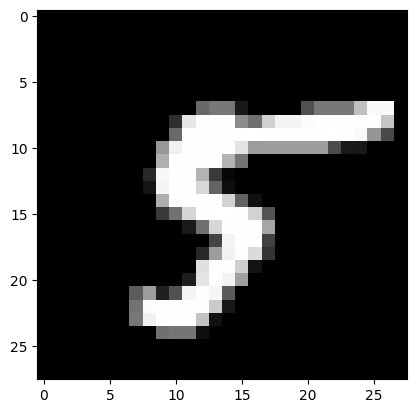

In [23]:
test_prediction(145, W1, b1, W2, b2)

In [24]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 0 3 7 4 1 5 4 8 9 2 6 9 7 0 5 8 6 5 2 8 9 9 8 1 2 9 2 3 3 1 8 6 8 3 0 9
 9 9 6 6 6 6 8 0 1 1 4 7 7 8 6 1 7 8 4 3 5 1 1 7 4 2 8 3 9 6 3 8 9 7 9 4 5
 8 0 0 2 8 9 3 7 4 1 3 9 5 4 3 6 9 9 5 1 3 0 1 6 7 5 5 0 2 4 6 4 7 2 1 0 0
 7 4 7 9 9 1 7 5 0 5 4 0 1 2 3 4 2 4 0 2 0 9 3 7 5 7 7 1 5 1 2 2 8 3 4 2 4
 3 7 4 1 5 3 2 2 6 7 7 2 5 8 5 7 8 0 7 8 1 2 4 5 1 9 3 1 8 6 6 8 4 9 5 1 6
 1 8 5 4 6 6 6 7 7 2 7 9 0 0 1 1 9 9 8 2 1 7 1 4 8 0 6 5 0 0 6 3 3 3 7 3 4
 9 3 2 9 5 0 0 0 1 2 9 9 9 9 7 9 7 4 6 0 6 2 7 9 5 9 4 5 7 9 2 9 5 1 5 3 4
 7 7 4 8 6 3 0 7 8 4 5 4 2 2 7 4 0 2 5 7 3 4 5 5 9 3 1 8 7 1 2 9 2 1 1 9 4
 1 4 5 9 8 2 9 6 8 8 7 2 4 1 9 2 8 0 8 9 9 8 6 3 8 3 4 2 5 8 8 1 7 2 4 0 8
 2 8 8 8 6 9 5 8 5 5 0 2 8 3 3 4 1 6 9 7 4 0 7 8 2 6 6 3 4 0 8 5 6 7 4 9 7
 8 8 4 6 7 7 4 3 5 7 2 4 8 4 9 6 4 6 0 1 1 0 0 0 9 6 9 8 9 5 7 2 2 6 4 5 1
 2 4 0 3 6 3 3 5 2 9 3 8 7 3 8 0 1 6 8 7 8 7 8 5 3 2 9 9 0 2 8 1 1 5 3 1 8
 9 9 6 0 2 5 7 2 4 2 9 3 9 8 3 3 3 6 7 8 9 7 2 2 5 7 4 9 5 0 5 2 6 7 9 0 1
 3 8 3 1 3 1 4 1 3 0 4 6 

0.816